In [23]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

# Шлях до файлу CSV
file_path = r"C:\Users\a0494\Desktop\Nasa_hac\fires_with_speed_share.csv"

# Завантаження датасету
df = pd.read_csv(file_path)

# Виведення назв стовпців
print("Назви стовпців:")
print(df.columns)
# Виведення розміру датасету (кількість рядків та стовпців)
print("\nРозмір датасету:")
print(df.shape)
df.drop(['acq_date','instrument'], axis=1, inplace=True)
df.head()

Назви стовпців:
Index(['X', 'Y', 'elevation', 'acq_time', 'frp', 'acq_date', 'confidence',
       'latitude', 'scan', 'instrument', 'time_sprea', 'type', 'slope',
       'version', 'brightness', 'group_id', 'bright_t31', 'daynight', 'id',
       'satellite', 'track', 'Map', 'longitude', 'nearest',
       'distance_to_nearest'],
      dtype='object')

Розмір датасету:
(20537, 25)


,X,Y,elevation,acq_time,frp,confidence,latitude,scan,time_sprea,type,...,group_id,bright_t31,daynight,id,satellite,track,Map,longitude,nearest,distance_to_nearest
0,29.280901,44.837902,-1.0,7,14.2,69,44.8379,1.0,2.0,0,...,8390.0,272.9,N,50106,Aqua,1.0,90.0,29.2809,NaN,NaN
1,29.255600,44.841398,-1.0,7,27.1,100,44.8414,1.0,2.0,0,...,8390.0,274.3,N,50105,Aqua,1.0,90.0,29.2556,NaN,NaN
2,29.257999,44.850401,-1.0,7,12.9,13,44.8504,1.0,2.0,0,...,8390.0,272.8,N,50103,Aqua,1.0,90.0,29.2580,NaN,NaN
3,29.245402,44.852100,-1.0,7,26.4,100,44.8521,1.0,2.0,0,...,8390.0,273.5,N,50102,Aqua,1.0,90.0,29.2454,NaN,NaN
4,29.288098,44.864701,-1.0,7,15.1,74,44.8647,1.0,2.0,0,...,8390.0,272.8,N,50101,Aqua,1.0,90.0,29.2881,NaN,NaN


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

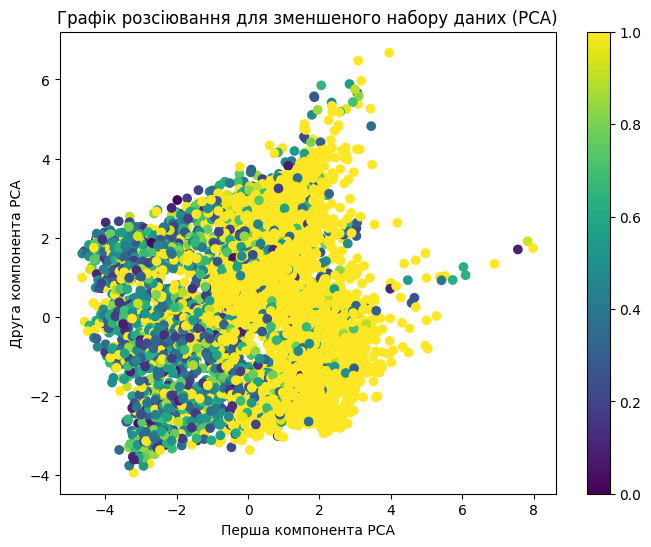

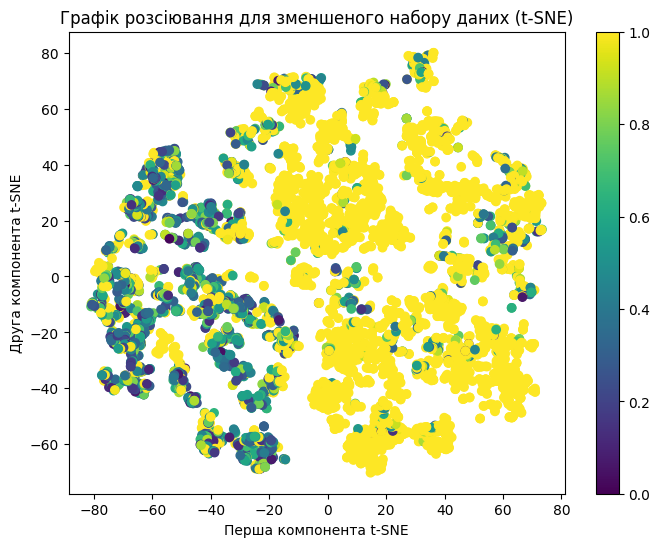

In [24]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Додано імпорт бібліотеки для вибору колірної мапи
from matplotlib.colors import ListedColormap

# Обробка текстових даних і видалення рядків з нульовими значеннями
# Наприклад, якщо ви хочете видалити рядки з нульовими значеннями в усіх стовпцях:
df.dropna(inplace=True)

# Стандартизація числових даних
scaler = StandardScaler()
numeric_data = df.select_dtypes(include=[int, float])
scaled_data = scaler.fit_transform(numeric_data)

# Метод зменшення розмірності (PCA)
pca = PCA(n_components=2)
reduced_data_pca = pca.fit_transform(scaled_data)

# Метод зменшення розмірності (t-SNE)
tsne = TSNE(n_components=2, random_state=42)
reduced_data_tsne = tsne.fit_transform(scaled_data)

# Додано стовпець "distance_to_nearest" для визначення кольору
distance_to_nearest = df['distance_to_nearest']

# Вибираємо колірну мапу (можна замінити на іншу за бажанням)
cmap = plt.get_cmap('viridis')

# Визначаємо кольори на основі значень "distance_to_nearest"
colors = [cmap(value) for value in distance_to_nearest]

# Графік розсіювання для зменшеного набору даних (PCA)
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_pca[:, 0], reduced_data_pca[:, 1], c=colors)  # Додаємо кольори
plt.xlabel('Перша компонента PCA')
plt.ylabel('Друга компонента PCA')
plt.title('Графік розсіювання для зменшеного набору даних (PCA)')
plt.colorbar()
plt.show()

# Графік розсіювання для зменшеного набору даних (t-SNE)
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_tsne[:, 0], reduced_data_tsne[:, 1], c=colors)  # Додаємо кольори
plt.xlabel('Перша компонента t-SNE')
plt.ylabel('Друга компонента t-SNE')
plt.title('Графік розсіювання для зменшеного набору даних (t-SNE)')
plt.colorbar()
plt.show()

# Гістограми розподілу числових ознак
# numeric_data.hist(bins=20, figsize=(15, 10))
# plt.suptitle('Гістограми розподілу числових ознак', x=0.5, y=0.92, ha='center', fontsize='large')
# plt.show()